In [12]:
#Import tools
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [13]:
#Read data and import full file.
df = pd.read_csv('/Users/windyseng/Desktop/Project/FY17NYCSpendDataQ1-Q4.csv', header=None, low_memory=False)
df.columns = ['Source','Invoice Paid Date','Fiscal Year','Supplier ID','Supplier Name.Level1','Supplier Name.Level2','Commodity L1','Commodity L2','Commodity L3','PR Department','Unit of Appropriation','MA Contract Number','PR Doc ID','FMS Commodity Code','FMS Commodity Level 1','FMS Commodity Level 2','Industry','Award Doc Code Name','Budget Code Label','Fund Name','Award Number','Award Doc Identification Name','Award Doc Identification Description v','Award Details Award Method Code','Award Details Award Method Name','Award Details Contract Class Code','Award Details Contract Class Name','Award Hdr Electronic Order Type Detail','Award Hdr Original Max Contract Amount','Award Hdr Max Contract Amt','Award Doc Version No','Award Comm Line Description','Award Doc Dept Code','Award Doc Dept Name','MWBE Status','Amount in USD']
df.head()

,Source,Invoice Paid Date,Fiscal Year,Supplier ID,Supplier Name.Level1,Supplier Name.Level2,Commodity L1,Commodity L2,Commodity L3,PR Department,...,Award Details Contract Class Name,Award Hdr Electronic Order Type Detail,Award Hdr Original Max Contract Amount,Award Hdr Max Contract Amt,Award Doc Version No,Award Comm Line Description,Award Doc Dept Code,Award Doc Dept Name,MWBE Status,Amount in USD
0,Quarter,Invoice Paid Date,Fiscal Year,Supplier ID,Supplier Name.Level1,Supplier Name.Level2,Commodity L1,Commodity L2,Commodity L3,PR Department,...,Award Details Contract Class Name,Award Hdr Electronic Order Type Detail,Award Hdr Original Max Contract Amount,Award Hdr Max Contract Amt,Award Doc Version No,Award Comm Line Description,Award Doc Dept Code,Award Doc Dept Name,MWBE Status,Amount in USD
1,1,7/1/16,2017,VS00010491,ITEGIX LLC-,ITEGIX LLC,General & Administrative,Fleet Vehicles,Fleet Vehicle Maintenance & Repair,056-POLICE DEPARTMENT,...,EXPENSE/GENERAL CONTRACT,(blank),"17,397","17,397",1,GARMIN,56,Police Department,No,396
2,1,7/1/16,2017,VS00010491,ITEGIX LLC-,ITEGIX LLC,General & Administrative,Fleet Vehicles,Fleet Vehicle Maintenance & Repair,056-POLICE DEPARTMENT,...,EXPENSE/GENERAL CONTRACT,(blank),"17,397","17,397",1,GARMIN,56,Police Department,No,"2,835"
3,1,7/1/16,2017,VS00010491,ITEGIX LLC-,ITEGIX LLC,General & Administrative,Fleet Vehicles,Fleet Vehicle Maintenance & Repair,056-POLICE DEPARTMENT,...,EXPENSE/GENERAL CONTRACT,(blank),"17,397","17,397",1,GARMIN,56,Police Department,No,"3,690"
4,1,7/1/16,2017,523574,GENERAL FOUNDRIES INC,GENERAL FOUNDRIES INC,Facilities,Building Materials,Construction Supplies and Materials,841-DEPARTMENT OF TRANSPORTATION,...,EXPENSE/GENERAL CONTRACT,(blank),"31,000","31,000",1,SEWER COVER,841,Department of Transportation,No,"6,200"


In [14]:
#Review the number of observations in the dataset
df.count()

Source                                    388524
Invoice Paid Date                         388524
Fiscal Year                               388524
Supplier ID                               388524
Supplier Name.Level1                      388524
Supplier Name.Level2                      388524
Commodity L1                              388524
Commodity L2                              388524
Commodity L3                              388524
PR Department                             388524
Unit of Appropriation                     388524
MA Contract Number                        388524
PR Doc ID                                 388524
FMS Commodity Code                        388524
FMS Commodity Level 1                     388524
FMS Commodity Level 2                     388524
Industry                                  388524
Award Doc Code Name                       388524
Budget Code Label                         388524
Fund Name                                 388524
Award Number        

In [15]:
#Summary table
df.describe()

,Source,Invoice Paid Date,Fiscal Year,Supplier ID,Supplier Name.Level1,Supplier Name.Level2,Commodity L1,Commodity L2,Commodity L3,PR Department,...,Award Details Contract Class Name,Award Hdr Electronic Order Type Detail,Award Hdr Original Max Contract Amount,Award Hdr Max Contract Amt,Award Doc Version No,Award Comm Line Description,Award Doc Dept Code,Award Doc Dept Name,MWBE Status,Amount in USD
count,388524,388524,388524,388524,388524,388524,388524,388524,388524,388524,...,388524,388524,388524,388524,388524,388524,388524,388524,388524,388524
unique,5,249,2,8753,8662,9096,12,40,160,16,...,10,4,11422,12739,152,17005,27,28,3,59182
top,3,7/5/16,2017,1732420,WB MASON,WB MASON CO INC,Facilities,Human Services,Office Supplies,056-POLICE DEPARTMENT,...,EXPENSE/GENERAL CONTRACT,(blank),0,0,1,"FUEL OIL, DIESEL (USE 405-02 FOR BIODIESEL)",857,DCASDIVISION OF MUNICIPAL SUPPLY SERVICE,No,0
freq,99902,6123,388523,24471,24471,24471,141936,60721,28285,50848,...,178719,334746,41056,40815,190683,12717,122667,122667,360124,7670


In [16]:
#Replace spaces and periods in the column names to make sure you can call the parameters later using replace.
df.columns = pd.Series(df.columns).str.replace(' ','_') #replaces all the spaces within the column titles
df.columns = pd.Series(df.columns).str.replace('.','_') #replaces all the periods within the column titles
df.head() #prints the first 5 rows in the dataframe

,Source,Invoice_Paid_Date,Fiscal_Year,Supplier_ID,Supplier_Name_Level1,Supplier_Name_Level2,Commodity_L1,Commodity_L2,Commodity_L3,PR_Department,...,Award_Details_Contract_Class_Name,Award_Hdr_Electronic_Order_Type_Detail,Award_Hdr_Original_Max_Contract_Amount,Award_Hdr_Max_Contract_Amt,Award_Doc_Version_No,Award_Comm_Line_Description,Award_Doc_Dept_Code,Award_Doc_Dept_Name,MWBE_Status,Amount_in_USD
0,Quarter,Invoice Paid Date,Fiscal Year,Supplier ID,Supplier Name.Level1,Supplier Name.Level2,Commodity L1,Commodity L2,Commodity L3,PR Department,...,Award Details Contract Class Name,Award Hdr Electronic Order Type Detail,Award Hdr Original Max Contract Amount,Award Hdr Max Contract Amt,Award Doc Version No,Award Comm Line Description,Award Doc Dept Code,Award Doc Dept Name,MWBE Status,Amount in USD
1,1,7/1/16,2017,VS00010491,ITEGIX LLC-,ITEGIX LLC,General & Administrative,Fleet Vehicles,Fleet Vehicle Maintenance & Repair,056-POLICE DEPARTMENT,...,EXPENSE/GENERAL CONTRACT,(blank),"17,397","17,397",1,GARMIN,56,Police Department,No,396
2,1,7/1/16,2017,VS00010491,ITEGIX LLC-,ITEGIX LLC,General & Administrative,Fleet Vehicles,Fleet Vehicle Maintenance & Repair,056-POLICE DEPARTMENT,...,EXPENSE/GENERAL CONTRACT,(blank),"17,397","17,397",1,GARMIN,56,Police Department,No,"2,835"
3,1,7/1/16,2017,VS00010491,ITEGIX LLC-,ITEGIX LLC,General & Administrative,Fleet Vehicles,Fleet Vehicle Maintenance & Repair,056-POLICE DEPARTMENT,...,EXPENSE/GENERAL CONTRACT,(blank),"17,397","17,397",1,GARMIN,56,Police Department,No,"3,690"
4,1,7/1/16,2017,523574,GENERAL FOUNDRIES INC,GENERAL FOUNDRIES INC,Facilities,Building Materials,Construction Supplies and Materials,841-DEPARTMENT OF TRANSPORTATION,...,EXPENSE/GENERAL CONTRACT,(blank),"31,000","31,000",1,SEWER COVER,841,Department of Transportation,No,"6,200"


In [17]:
#Create a subset of the dataframe using first 100 rows and selecting specific columns to test.
subset=df[['Source','Supplier_Name_Level1','PR_Department','Commodity_L2','Amount_in_USD']]
test=subset.iloc[0:101, 0:5]
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 5 columns):
Source                  101 non-null object
Supplier_Name_Level1    101 non-null object
PR_Department           101 non-null object
Commodity_L2            101 non-null object
Amount_in_USD           101 non-null object
dtypes: object(5)
memory usage: 4.0+ KB


In [18]:
#Drop NA values from subset if any
test.dropna(subset = ['Source','Supplier_Name_Level1','PR_Department','Commodity_L2','Amount_in_USD'])

,Source,Supplier_Name_Level1,PR_Department,Commodity_L2,Amount_in_USD
0,Quarter,Supplier Name.Level1,PR Department,Commodity L2,Amount in USD
1,1,ITEGIX LLC-,056-POLICE DEPARTMENT,Fleet Vehicles,396
2,1,ITEGIX LLC-,056-POLICE DEPARTMENT,Fleet Vehicles,"2,835"
3,1,ITEGIX LLC-,056-POLICE DEPARTMENT,Fleet Vehicles,"3,690"
4,1,GENERAL FOUNDRIES INC,841-DEPARTMENT OF TRANSPORTATION,Building Materials,"6,200"
5,1,NU-TECH PRODUCTS INC,069-DEPARTMENT OF SOCIAL SERVICES,MRO Supplies,"1,978"
6,1,GLOBAL PACKAGING-,841-DEPARTMENT OF TRANSPORTATION,Packaging,62
7,1,SID TOOL CO INC,841-DEPARTMENT OF TRANSPORTATION,MRO Supplies,49
8,1,EDGE ELECTRONICS,056-POLICE DEPARTMENT,MRO Supplies,121
9,1,EDGE ELECTRONICS,056-POLICE DEPARTMENT,MRO Supplies,95


In [19]:
import seaborn as sb
%matplotlib inline

sb.factorplot(
    x='Source',
    y='Amount_in_USD',
    data=test, 
    kind='box'
);

ValueError: Neither the `x` nor `y` variable appears to be numeric.

In [20]:
#Convert last column to numeric
test[['Amount_in_USD']] = test[['Amount_in_USD']].apply(pd.to_numeric, errors='coerce')

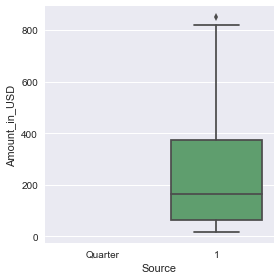

In [21]:
import seaborn as sb
%matplotlib inline

sb.factorplot(
    x='Source',
    y='Amount_in_USD',
    data=test, 
    kind='box'
);

/Applications/anaconda/lib/python2.7/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/Applications/anaconda/lib/python2.7/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


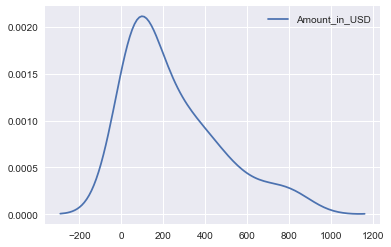

In [23]:
import seaborn as sns
sns.kdeplot(test['Amount_in_USD'])

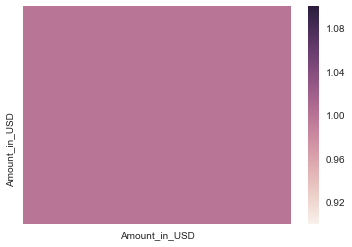

In [24]:
import seaborn as sns
corr = test.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [25]:
import pandas as pd
import matplotlib.pylab as plt
from sklearn import preprocessing
from scipy.stats import skew

In [26]:
#FillNa
test['Source'].fillna(0,inplace=True)
test['Supplier_Name_Level1'].fillna(0,inplace=True)
test['PR_Department'].fillna(0,inplace=True)
test['Commodity_L2'].fillna(0,inplace=True)
test['Amount_in_USD'].fillna(0,inplace=True)

In [27]:
spend=preprocessing.scale(test['Amount_in_USD'])
skness=skew(spend)

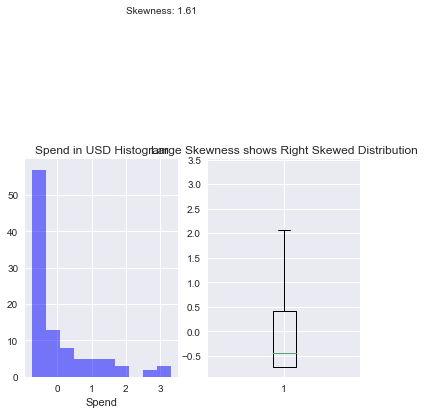

In [28]:
figure = plt.figure()
figure.add_subplot(121)   
plt.hist(spend,facecolor='blue',alpha=0.5) 
plt.xlabel("Spend") 
plt.title("Spend in USD Histogram") 
plt.text(2,100,"Skewness: {0:.2f}".format(skness)) 

figure.add_subplot(122) 
plt.boxplot(spend)
plt.title("Large Skewness shows Right Skewed Distribution")
plt.show()